In [19]:
from keras.models import load_model
from numpy import expand_dims
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
!pip install mtcnn
from mtcnn.mtcnn import MTCNN
from os.path import isdir
import os
import tensorflow as tf
# load the model
#model = load_model('/content/facenet_keras3.h5')
!pip install keras-facenet
from keras_facenet import FaceNet
model = FaceNet()
# summarize input and output shape
label='images14Kupdated.csv'
import csv
def get_l(f):
    with open(label, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=True)
        for row in reader:
            f=f.replace('.jpg',"")
            f=f.replace('-WithMask',"")
            r=row[0]
            r=r.replace('train/',"")
            if(f==r):
                return row[4]

import cv2 
tf.config.optimizer.set_jit(True)   
def load_faces(folder):
    faces=list()
    y1=list()
    c=0
    for filename in os.listdir(folder):
      if(c==1000):
        break
      path=os.path.join(folder,filename)

      
      face = cv2.imread(path)
      img = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    
      width =84
      height =84
      dim = (width, height)
  

      resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)  
      face=resized
     
      y=get_l(filename)
      if(y==None):
        continue
      y1.append(str(y))
      faces.append(face)
      c+=1
      
      print(c)
    return faces,y1
def load_dataset(directory):
    X, Y= list(), list()
    # enumerate folders, on per class
    faces,y=load_faces(directory)
    
    X.extend(faces)
    Y.extend(y)
    return asarray(X),asarray(Y)

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)


Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Final\ Year\ Project/Dataset/Put\ Mask\ On\ images

/content/drive/MyDrive/Final Year Project/Dataset/Put Mask On images


In [20]:
X,Y=load_dataset('Images14KWithMask')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [21]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

1000 84 84


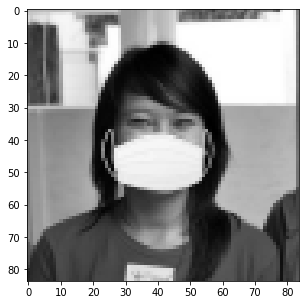

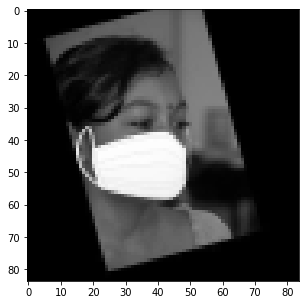

In [22]:
X = X.astype('float32')
x,y,z=X.shape
print(x,y,z)
data = X.reshape(1000, 84,84)
images_arr = data.reshape(-1,84,84, 1)
import matplotlib.pyplot as plt
import numpy as np
for i in range(2):
    plt.figure(figsize=[5, 5])
    curr_img = np.reshape(images_arr[i], (84,84))
    plt.imshow(curr_img, cmap='gray')
    plt.show()
images_arr = images_arr / np.max(images_arr)
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(images_arr,
                                                             images_arr,
                                                             test_size=0.2,
                                                             random_state=13)

In [23]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
batch_size = 128
epochs = 50
inChannel = 1
x, y =84,84
input_img = Input(shape = (x, y, inChannel))

In [24]:
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [25]:
autoencoder.load_weights('autoencoder.h5')

In [26]:
def get_embedding(model,face_pixels):
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    l=list()
    l.append(face_pixels)
    l=np.array(l)
    # make prediction to get embedding
    yhat = autoencoder.predict(l)
    return yhat[0]
NX=[]
for face_pixels in X:
    
    embedding = get_embedding(autoencoder, face_pixels)
    NX.append(embedding)
newTestX = asarray(NX)

In [44]:
print(newTestX.shape)
r=newTestX.reshape(84,84,1000)
r=newTestX.reshape(-1,1000)
r=newTestX.reshape(1000,7056)
trainX=r[800:]
testX1=r[:800]
testX=r[:800]
testy=Y[:800]
trainy=Y[800:]

(1000, 84, 84, 1)


In [43]:
import pickle
loaded_model = pickle.load(open('KNN_70.pkl', 'rb'))

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(Y)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
out_encoder.classes_
y_hat=loaded_model.predict(testX)
y_hat=out_encoder.inverse_transform(y_hat)
testy=out_encoder.inverse_transform(testy)

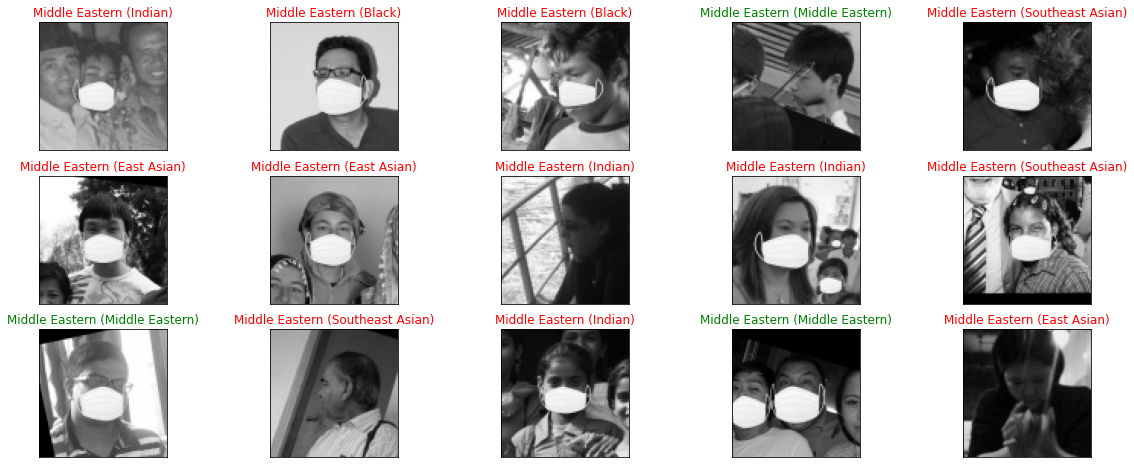

In [50]:
from google.colab.patches import cv2_imshow
labels =['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
       'Middle Eastern', 'Southeast Asian', 'White']

import cv2
import matplotlib.pyplot as plt
x_val=images_arr[666:780]
y_val=testy



figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_val.shape[0], size=15,replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(cv2.cvtColor(x_val[index], cv2.COLOR_BGR2RGB))
    predict_index = y_hat[index]
    true_index = y_val[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()